# This notebook has been tested with 
* Python 3.5
* Keras 2.0.6
* Tensorflow 1.2.1

In [1]:
%matplotlib inline
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

Using TensorFlow backend.


# Load model had been trained

In [2]:
model = load_model('gender_classify_middle_hiar_man.h5')

In [3]:
label_dict = {0:'female', 1:'male'}

# Crop and predict image

In [4]:
def cropAndPred(image, x, y, w, h):
    center_x = x+w/2
    center_y = y+h/2
    b_dim = min(max(w,h)*1.2,image.width, image.height) 
    box = (center_x-b_dim/2, center_y-b_dim/2, center_x+b_dim/2, center_y+b_dim/2)
    crpim = image.crop(box).resize((96,96))

    im2Arr = np.asarray(crpim)
    x_test_nor = im2Arr.astype('float32') / 255.0
    x_test_nor = x_test_nor[np.newaxis,:]
    
    Prediction=model.predict_classes(x_test_nor)
    
    return Prediction[0]

# Rectangle and show image

In [5]:
def rectAndShow(filename, scaleFactor=1.05, minNeighbor=3, minSize=(100,100)):
    faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
    image = cv2.imread(filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, scaleFactor, minNeighbor, minSize=minSize)
    print("Found %d faces!"%(len(faces)))

    im = Image.open(filename)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 4)
        label = cropAndPred(im, x, y, w, h)
        cv2.putText(image, label_dict[label], (x,y), cv2.FONT_HERSHEY_SIMPLEX, w/80, (0, 255, 0), 4)
        
    plt.figure(figsize=(10,5))
    plt.imshow(image)

# Test result

Found 2 faces!
1/1 [==============================] - 0s
Take 0.162 seconds


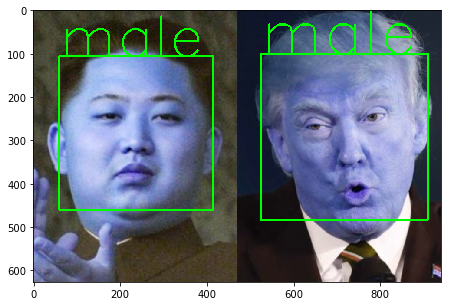

In [8]:
start = time.time()
rectAndShow('Trump_Kim.jpg')
end = time.time()
print("Take %.3f seconds"%(end-start))

Found 2 faces!
1/1 [==============================] - 0s
Take 0.161 seconds


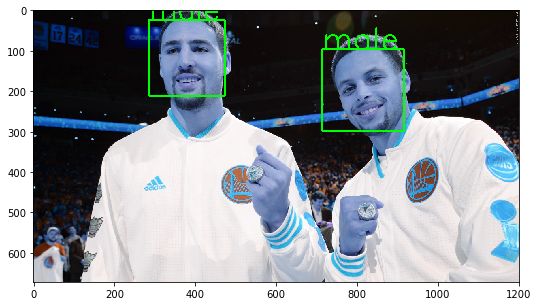

In [9]:
start = time.time()
rectAndShow('stephen-curry-klay-thompson.jpeg')
end = time.time()
print("Take %.3f seconds"%(end-start))

Found 6 faces!
1/1 [==============================] - 0s
Take 0.327 seconds


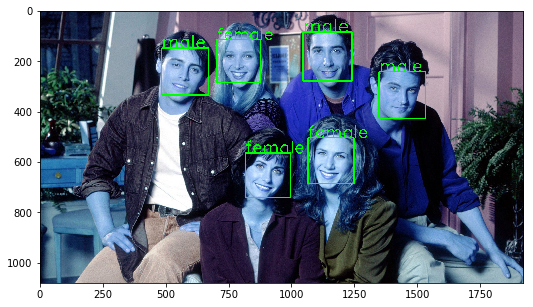

In [10]:
start = time.time()
rectAndShow('friends-cast-today-tease.jpg', 1.1)
end = time.time()
print("Take %.3f seconds"%(end-start))